In [331]:
#Dependencies
import json
import pprint
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import hvplot.pandas
import scipy.stats as stats

In [220]:
#CSV to data frame
tor_df = pd.read_csv("../Data/tor_data.csv")
van_df = pd.read_csv("../Data/van_data.csv")

In [221]:
#Toronto restaurants sum grouped by price point 
sum_tor_df = tor_df.groupby(["Price(1-5)"]).sum()
sum_tor_df

,Rating,Number of Reviews,Latitude,Longitude
Price(1-5),,,,
0,1656.0,8046,17117.383263,-31124.375006
1,405.5,13505,4235.210158,-7701.582447
2,1622.5,75939,17684.323645,-32157.016888
3,315.5,17222,3493.051372,-6351.768919
4,107.0,6440,1135.269058,-2064.286059


In [222]:
#Vancouver restaurants sum grouped by price point 
sum_van_df = van_df.groupby(["Price(1-5)"]).sum()
sum_van_df

,Rating,Number of Reviews,Latitude,Longitude
Price(1-5),,,,
0,1448.0,6473,17146.289004,-42842.497169
1,386.0,10198,4680.962023,-11696.182780
2,1864.0,94798,23157.115856,-57861.209468
3,273.5,20634,3400.031017,-8495.615477
4,72.0,5000,886.910794,-2216.223700


In [223]:
#Toronto restaurants average grouped by price point 
mean_tor_df = tor_df.groupby(["Price(1-5)"]).mean()
mean_tor_df

,Rating,Number of Reviews,Latitude,Longitude
Price(1-5),,,,
0,4.224490,20.525510,43.666794,-79.398916
1,4.180412,139.226804,43.661960,-79.397757
2,4.006173,187.503704,43.664997,-79.400042
3,3.943750,215.275000,43.663142,-79.397111
4,4.115385,247.692308,43.664195,-79.395618


In [224]:
#Vancouver restaurants average grouped by price point 
mean_van_df = van_df.groupby(["Price(1-5)"]).mean()
mean_van_df

,Rating,Number of Reviews,Latitude,Longitude
Price(1-5),,,,
0,4.160920,18.600575,49.270945,-123.110624
1,4.063158,107.347368,49.273284,-123.117713
2,3.965957,201.697872,49.270459,-123.108956
3,3.963768,299.043478,49.275812,-123.124862
4,4.000000,277.777778,49.272822,-123.123539


In [225]:
#Summary chart of total reviews and average rating of toronto and vancouver
restaurants_tor = [len(tor_df[(tor_df["Price(1-5)"]==0)]),len(tor_df[(tor_df["Price(1-5)"]==1)]),len(tor_df[(tor_df["Price(1-5)"]==2)]),len(tor_df[(tor_df["Price(1-5)"]==3)]),len(tor_df[(tor_df["Price(1-5)"]==4)])]
restaurants_van = [len(van_df[(van_df["Price(1-5)"]==0)]),len(van_df[(van_df["Price(1-5)"]==1)]),len(van_df[(van_df["Price(1-5)"]==2)]),len(van_df[(van_df["Price(1-5)"]==3)]),len(van_df[(van_df["Price(1-5)"]==4)])]
tor_total_reviews = sum_tor_df["Number of Reviews"].tolist()
van_total_reviews = sum_van_df["Number of Reviews"].tolist()
tor_average_rating = mean_tor_df["Rating"].tolist()
van_average_rating = mean_van_df["Rating"].tolist()
pricesymb = ["None","$","$$","$$$","$$$$"]
pricepoint = ["None","Less than $10","$11-30","$31-60","More than $61"]

summary_chart = {
    "Price($)":pricesymb,
    "Price Range":pricepoint,
    "Number of Restaurants (Tor)":restaurants_tor,
    "Number of Restaurants (Van)":restaurants_van,
    "Total Reviews (Tor)":tor_total_reviews,
    "Total Reviews (Van)":van_total_reviews,
    "Average Rating (Tor)":tor_average_rating,
    "Average Rating (Van)":van_average_rating,
    }

summary_chart_df = pd.DataFrame(summary_chart)
summary_chart_df


,Price($),Price Range,Number of Restaurants (Tor),Number of Restaurants (Van),Total Reviews (Tor),Total Reviews (Van),Average Rating (Tor),Average Rating (Van)
0,None,None,392,348,8046,6473,4.224490,4.160920
1,$,Less than $10,97,95,13505,10198,4.180412,4.063158
2,$$,$11-30,405,470,75939,94798,4.006173,3.965957
3,$$$,$31-60,80,69,17222,20634,3.943750,3.963768
4,$$$$,More than $61,26,18,6440,5000,4.115385,4.000000


In [226]:
#midsize restaurants dataframe for toronto sorted by rating then number of reviews
mid_tor_df = tor_df[(tor_df["Price(1-5)"]==2)]
rating_review_tor_df = mid_tor_df.sort_values(by=["Rating","Number of Reviews"],ascending = False)

#midsize restaurants dataframe for vancouver sorted by rating then number of reviews
mid_van_df = van_df[(van_df["Price(1-5)"]==2)]
rating_review_van_df = mid_van_df.sort_values(by=["Rating","Number of Reviews"],ascending = False)

In [227]:
rating_review_tor_df

,Restaurant Name,Address,Category,Rating,Number of Reviews,Price($),Price(1-5),Latitude,Longitude
318,Baretto Caffe,1262 Don Mills Road,Cafes,5.0,349,$$,2,43.744710,-79.346430
277,Zeal Burgers,1926 Weston Road,Burgers,5.0,139,$$,2,43.700276,-79.517078
21,Grandma Loves You,1084 Yonge Street,Sandwiches,5.0,72,$$,2,43.677846,-79.390108
811,Stock In Trade,307 Danforth Avenue,Butcher,5.0,30,$$,2,43.676985,-79.353838
752,My Secret Kitchen,316 Lakeshore Road E,Italian,5.0,18,$$,2,43.562040,-79.575020
...,...,...,...,...,...,...,...,...,...
661,Against the Grain,25 Dockside Drive,Canadian (New),2.5,294,$$,2,43.643650,-79.366330
852,Carens Rosedale,1118 Yonge Street,French,2.5,45,$$,2,43.678910,-79.390530
668,Avenue Diner,222 Davenport Rd,Diners,2.5,23,$$,2,43.674840,-79.397160
713,The Carousel Café,Toronto Islands,American (Traditional),2.0,47,$$,2,43.628947,-79.394420


In [228]:
#converting categories into a list 
tor_categ = rating_review_tor_df["Category"].unique().tolist()
print(sorted(tor_categ))

['Afghan', 'American (Traditional)', 'Arcades', 'Asian Fusion', 'Bakeries', 'Barbeque', 'Bars', 'Beer Bar', 'Bistros', 'Brazilian', 'Breakfast & Brunch', 'Breweries', 'British', 'Burgers', 'Butcher', 'Cafes', 'Canadian (New)', 'Caribbean', 'Caterers', 'Chicken Shop', 'Chinese', 'Cocktail Bars', 'Coffee & Tea', 'Colombian', 'Comfort Food', 'Cuban', 'Delicatessen', 'Delis', 'Desserts', 'Dim Sum', 'Diners', 'Egyptian', 'Ethiopian', 'Fast Food', 'Filipino', 'Fish & Chips', 'Food Court', 'Food Delivery Services', 'French', 'Gastropubs', 'German', 'Greek', 'Hawaiian', 'Himalayan/Nepalese', 'Hong Kong Style Cafe', 'Hot Dogs', 'Hungarian', 'Indian', 'Indonesian', 'International', 'Italian', 'Japanese', 'Kebab', 'Korean', 'Kosher', 'Latin American', 'Lounges', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Modern European', 'Moroccan', 'Noodles', 'Persian/Iranian', 'Peruvian', 'Pizza', 'Polish', 'Portuguese', 'Poutineries', 'Pubs', 'Ramen', 'Salad', 'Sandwiches', 'Seafood', 'Southern', 'Spanish

In [229]:
#counting the number of restaurants in each category
categ_tor = rating_review_tor_df["Category"].value_counts()
print(categ_tor[0:10])

Italian               33
Japanese              25
Breakfast & Brunch    22
Mexican               17
Korean                15
Pizza                 15
Bars                  13
Thai                  13
Canadian (New)        10
Ramen                 10
Name: Category, dtype: int64


In [230]:
#converting top ten categories into a list
categ_tor_list = categ_tor[0:10].index.values.tolist()
print(categ_tor_list)

['Italian', 'Japanese', 'Breakfast & Brunch', 'Mexican', 'Korean', 'Pizza', 'Bars', 'Thai', 'Canadian (New)', 'Ramen']


In [231]:
#dataframe for restaurants in the top ten category in toronto
top_ten_tor = rating_review_tor_df[rating_review_tor_df["Category"].isin(categ_tor_list)]
top_ten_tor

,Restaurant Name,Address,Category,Rating,Number of Reviews,Price($),Price(1-5),Latitude,Longitude
752,My Secret Kitchen,316 Lakeshore Road E,Italian,5.0,18,$$,2,43.562040,-79.575020
410,Ko'ox Hana,214 Augusta Avenue,Mexican,5.0,11,$$,2,43.654730,-79.402310
0,Pai Northern Thai Kitchen,18 Duncan Street,Thai,4.5,3335,$$,2,43.647840,-79.388720
88,Ramen Isshin,421 College Street,Ramen,4.5,795,$$,2,43.656340,-79.406890
5,Katsuya,66 Gerrard Street E,Japanese,4.5,478,$$,2,43.659950,-79.378820
...,...,...,...,...,...,...,...,...,...
724,Loaded Pierogi,524 Church Street,Bars,3.5,27,$$,2,43.664704,-79.380656
733,Hemingway's Restaurant,142 Cumberland St,Bars,3.0,290,$$,2,43.670150,-79.392790
824,Miss Korea,687 Yonge Street,Korean,3.0,124,$$,2,43.669074,-79.385948
926,The Miller Tavern,31 Bay Street,Bars,3.0,104,$$,2,43.642358,-79.377305


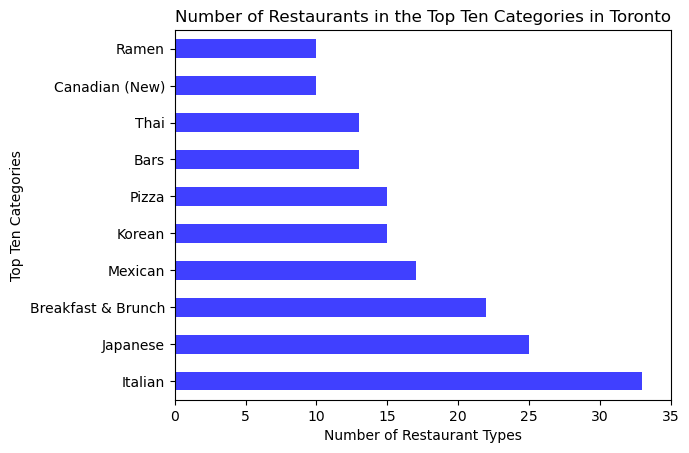

In [327]:
#horizontal bar graph for number of restaurants in top ten category in toronto
tor_categ_image = categ_tor[0:10].plot.barh(x="Category", y="Rating",xlim = [0,35],alpha = 0.75, color = "blue")
tor_categ_image.set_xlabel("Number of Restaurant Types")
tor_categ_image.set_ylabel("Top Ten Categories")
tor_categ_image.set_title("Number of Restaurants in the Top Ten Categories in Toronto")

#save image
plt.savefig("Images/tor_categ_image.png",bbox_inches = "tight")



In [233]:
rating_review_van_df

,Restaurant Name,Address,Category,Rating,Number of Reviews,Price($),Price(1-5),Latitude,Longitude
468,The Northern Cafe and Grill,1640 East Kent Avenue,Cafes,5.0,211,$$,2,49.280615,-122.759607
272,Number e food,1308 Burrard Street,Sandwiches,5.0,134,$$,2,49.277569,-123.131018
463,Blaze Gourmet Burgers,43 E 5th Avenue,Fast Food,5.0,19,$$,2,49.266644,-123.103743
21,Jam Cafe on Beatty,556 Beatty Street,Breakfast & Brunch,4.5,1298,$$,2,49.280259,-123.109638
6,Guu with Garlic,1698 Robson Street,Japanese,4.5,1021,$$,2,49.290249,-123.133814
...,...,...,...,...,...,...,...,...,...
876,Stages Bistro & Lounge,711 Broadway W,Lounges,3.0,22,$$,2,49.263760,-123.120460
104,Meat & Bread,796 W Broadway Street,Sandwiches,3.0,16,$$,2,49.263203,-123.121776
699,The Boathouse Restaurant,1305 Arbutus St,Seafood,2.5,234,$$,2,49.274294,-123.153670
892,Shanghai Lu,705 W Broadway,Dim Sum,2.5,57,$$,2,49.263475,-123.120028


In [234]:
#converting categories into a list 
van_categ = rating_review_van_df["Category"].unique().tolist()
print(sorted(van_categ))

['African', 'American (Traditional)', 'Asian Fusion', 'Australian', 'Bakeries', 'Barbeque', 'Bars', 'Beer Bar', 'Belgian', 'Bistros', 'Breakfast & Brunch', 'Burgers', 'Burmese', 'Butcher', 'Cafes', 'Cambodian', 'Canadian (New)', 'Caribbean', 'Cheese Shops', 'Chicken Shop', 'Chinese', 'Cocktail Bars', 'Coffee & Tea', 'Comfort Food', 'Desserts', 'Dim Sum', 'Diners', 'Dive Bars', 'Donairs', 'Ethiopian', 'Fast Food', 'Filipino', 'Fish & Chips', 'Food Trucks', 'French', 'Gastropubs', 'German', 'Greek', 'Grocery', 'Hakka', 'Halal', 'Hawaiian', 'Himalayan/Nepalese', 'Hot Pot', 'Indian', 'Irish', 'Italian', 'Japanese', 'Korean', 'Kosher', 'Latin American', 'Lebanese', 'Lounges', 'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Modern European', 'Noodles', 'Organic Stores', 'Pan Asian', 'Patisserie/Cake Shop', 'Persian/Iranian', 'Peruvian', 'Pizza', 'Poke', 'Portuguese', 'Pubs', 'Ramen', 'Salad', 'Sandwiches', 'Seafood', 'Singaporean', 'Southern', 'Spanish', 'Specialty Food', 'Sports

In [235]:
#counting the number of restaurants in each category
categ_van = rating_review_van_df["Category"].value_counts()
print(categ_van[0:10])

Japanese              50
Breakfast & Brunch    21
Cafes                 18
Italian               18
Canadian (New)        18
Mexican               18
Chinese               18
Ramen                 14
Korean                14
Vietnamese            14
Name: Category, dtype: int64


In [236]:
#converting top ten categories into a list
categ_van_list = categ_van[0:10].index.values.tolist()
print(categ_van_list)

['Japanese', 'Breakfast & Brunch', 'Cafes', 'Italian', 'Canadian (New)', 'Mexican', 'Chinese', 'Ramen', 'Korean', 'Vietnamese']


In [237]:
#dataframe for restaurants in the top ten category in vancouver
top_ten_van = rating_review_van_df[rating_review_van_df["Category"].isin(categ_van_list)]
top_ten_van

,Restaurant Name,Address,Category,Rating,Number of Reviews,Price($),Price(1-5),Latitude,Longitude
468,The Northern Cafe and Grill,1640 East Kent Avenue,Cafes,5.0,211,$$,2,49.280615,-122.759607
21,Jam Cafe on Beatty,556 Beatty Street,Breakfast & Brunch,4.5,1298,$$,2,49.280259,-123.109638
6,Guu with Garlic,1698 Robson Street,Japanese,4.5,1021,$$,2,49.290249,-123.133814
4,Kingyo,871 Denman Street,Japanese,4.5,1012,$$,2,49.290610,-123.137140
10,Fable Kitchen,1944 W 4th Avenue,Canadian (New),4.5,752,$$,2,49.267933,-123.149019
...,...,...,...,...,...,...,...,...,...
702,Tacofino Ocho,8 East 5th Ave,Mexican,3.0,85,$$,2,49.266368,-123.104530
603,I Cafe,2525 Heather St,Chinese,3.0,63,$$,2,49.263045,-123.120075
787,Baggio Gelateria & Pizzaeria,1089 Marinaside Crescent,Italian,3.0,59,$$,2,49.273641,-123.118430
975,Nonna's Table Cafe & Pizzeria,1489 E Hastings Street,Italian,3.0,29,$$,2,49.281366,-123.074312


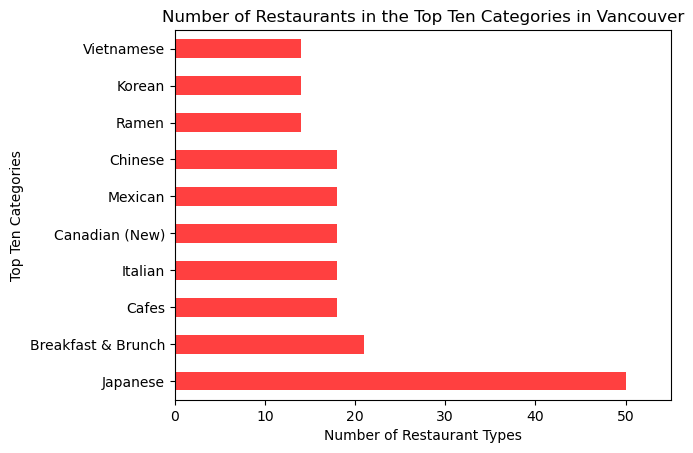

In [326]:
#horizontal bar graph for number of restaurants in top ten category in vancouver
van_categ_image = categ_van[0:10].plot.barh(x="Category", y="Rating",xlim = [0,55],alpha = 0.75,color="red")
van_categ_image.set_xlabel("Number of Restaurant Types")
van_categ_image.set_ylabel("Top Ten Categories")
van_categ_image.set_title("Number of Restaurants in the Top Ten Categories in Vancouver")

#save image
plt.savefig("Images/van_categ_image.png",bbox_inches = "tight")

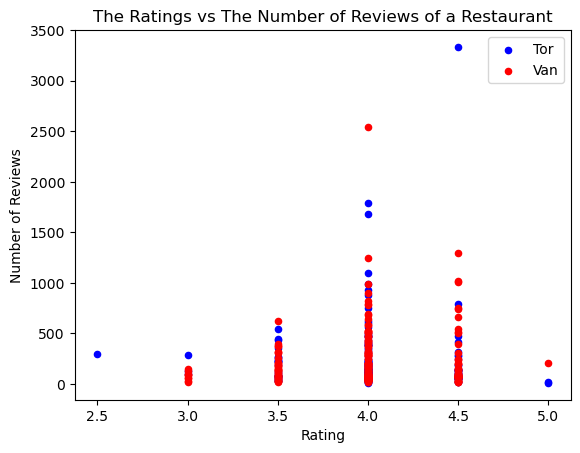

In [328]:
#scatter plot for rating vs number of reviews
tor_scatter= top_ten_tor.plot(kind="scatter", x="Rating",y="Number of Reviews",color = "blue",label ="Tor")
van_scatter = top_ten_van.plot(kind="scatter", x="Rating",y="Number of Reviews",color = "Red",label ="Van",ax=tor_scatter)
tor_scatter.set_title("The Ratings vs The Number of Reviews of a Restaurant")

#save image
plt.savefig("Images/scatterplot_image.png",bbox_inches = "tight")

In [246]:
#outlier in toronto top ten 
Best_tor = tor_df[(tor_df["Price(1-5)"]==2) & (tor_df["Rating"]==4.5) & (tor_df["Number of Reviews"]>3000)]
Best_tor

,Restaurant Name,Address,Category,Rating,Number of Reviews,Price($),Price(1-5),Latitude,Longitude
0,Pai Northern Thai Kitchen,18 Duncan Street,Thai,4.5,3335,$$,2,43.64784,-79.38872


In [307]:
#map of toronto restaurants in top ten category
tor_map = top_ten_tor.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    hover_cols = ["Restaurant Name", "Address","Category"],
    frame_width = 800,frame_height = 800,scale = 1.75,
    color = "Category"
)
tor_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Category,Restaurant Name,Address)

In [308]:
#map of vancouver restaurants in top ten category
van_map = top_ten_van.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    hover_cols = ["Restaurant Name", "Address","Category"],
    frame_width = 800,frame_height = 800,scale = 1.75,
    color = "Category"
)
van_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Category,Restaurant Name,Address)

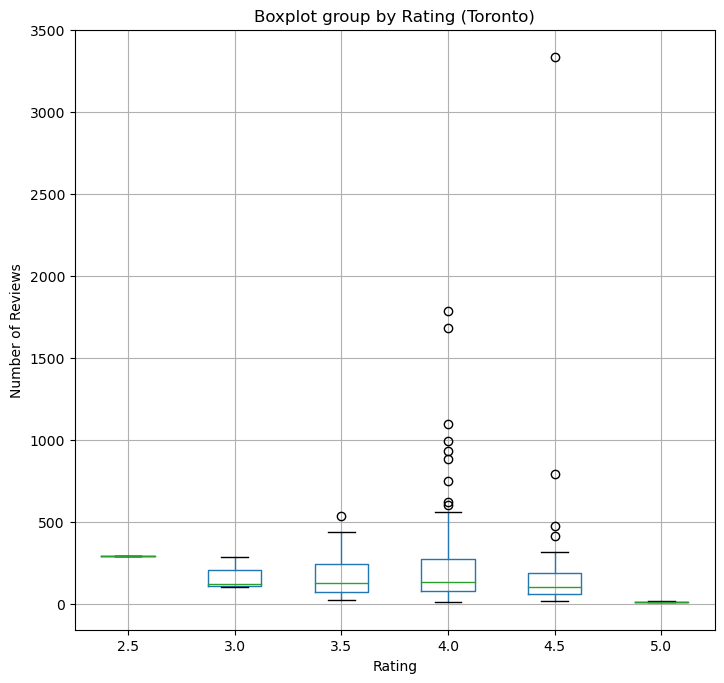

In [356]:
#boxplot of toronto restaurants grouped by rating
top_ten_tor.boxplot("Number of Reviews", by="Rating", figsize=(8, 8))
plt.suptitle("")
plt.ylabel("Number of Reviews")
plt.title("Boxplot group by Rating (Toronto)")

#save image
plt.savefig("Images/tor_boxplot_image.png",bbox_inches = "tight")

In [345]:
# Extract individual groups
tor_group0 = top_ten_tor[top_ten_tor["Rating"] == 2.5]["Number of Reviews"]
tor_group1 = top_ten_tor[top_ten_tor["Rating"] == 3]["Number of Reviews"]
tor_group2 = top_ten_tor[top_ten_tor["Rating"] == 3.5]["Number of Reviews"]
tor_group3 = top_ten_tor[top_ten_tor["Rating"] == 4]["Number of Reviews"]
tor_group4 = top_ten_tor[top_ten_tor["Rating"] == 4.5]["Number of Reviews"]
tor_group5 = top_ten_tor[top_ten_tor["Rating"] == 5]["Number of Reviews"]

# Perform the ANOVA
stats.f_oneway(tor_group0, tor_group1, tor_group2, tor_group3, tor_group4)

F_onewayResult(statistic=0.18276302152078827, pvalue=0.9470928352148807)

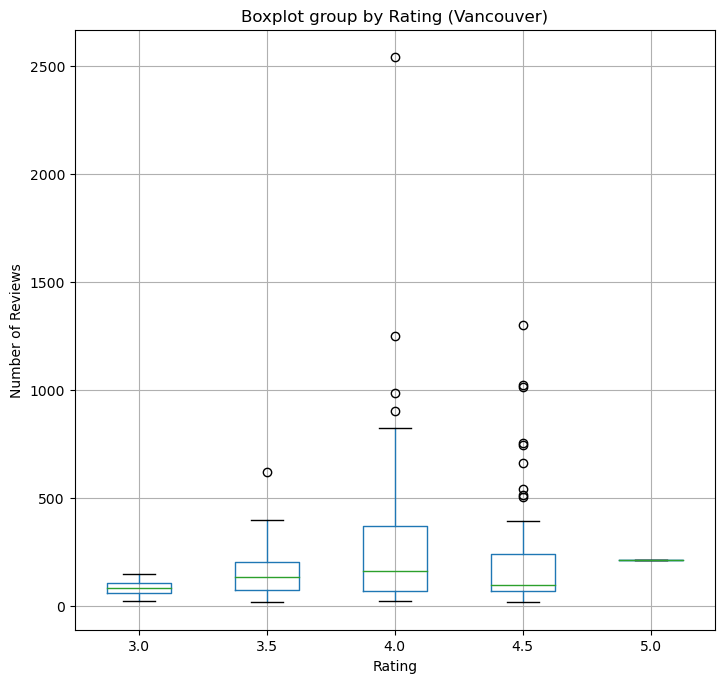

In [355]:
#boxplot of vancouver restaurants grouped by rating
top_ten_van.boxplot("Number of Reviews", by="Rating", figsize=(8, 8))
plt.suptitle("")
plt.ylabel("Number of Reviews")
plt.title("Boxplot group by Rating (Vancouver)")

#save image
plt.savefig("Images/van_boxplot_image.png",bbox_inches = "tight")

In [347]:
# Extract individual groups
van_group1 = top_ten_van[top_ten_van["Rating"] == 3]["Number of Reviews"]
van_group2 = top_ten_van[top_ten_van["Rating"] == 3.5]["Number of Reviews"]
van_group3 = top_ten_van[top_ten_van["Rating"] == 4]["Number of Reviews"]
van_group4 = top_ten_van[top_ten_van["Rating"] == 4.5]["Number of Reviews"]
van_group5 = top_ten_van[top_ten_van["Rating"] == 5]["Number of Reviews"]

# Perform the ANOVA
stats.f_oneway(van_group1, van_group2, van_group3, van_group4)

F_onewayResult(statistic=2.079029921757939, pvalue=0.10424842864103669)